In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
demographic_df = pd.read_csv("api_data_aadhar_demographic_0_500000.csv")

In [3]:
demographic_df.head()

,date,state,district,pincode,demo_age_5_17,demo_age_17_
0,01-03-2025,Uttar Pradesh,Gorakhpur,273213,49,529
1,01-03-2025,Andhra Pradesh,Chittoor,517132,22,375
2,01-03-2025,Gujarat,Rajkot,360006,65,765
3,01-03-2025,Andhra Pradesh,Srikakulam,532484,24,314
4,01-03-2025,Rajasthan,Udaipur,313801,45,785


In [4]:
demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500000 entries, 0 to 499999
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   date           500000 non-null  object
 1   state          500000 non-null  object
 2   district       500000 non-null  object
 3   pincode        500000 non-null  int64 
 4   demo_age_5_17  500000 non-null  int64 
 5   demo_age_17_   500000 non-null  int64 
dtypes: int64(3), object(3)
memory usage: 22.9+ MB


### Date Parsing (DD-MM-YYYY)

In [5]:
demographic_df["date"] = pd.to_datetime(
    demographic_df["date"],
    format="%d-%m-%Y"
)

### Total Demographic Transactions

In [6]:
demographic_df["total_demographic"] = (
    demographic_df["demo_age_5_17"] +
    demographic_df["demo_age_17_"]
)

In [7]:
demographic_df[
    ["demo_age_5_17", "demo_age_17_", "total_demographic"]
].describe()

,demo_age_5_17,demo_age_17_,total_demographic
count,500000.000000,500000.000000,500000.000000
mean,2.875866,25.714186,28.590052
std,19.741769,158.938263,176.139567
min,0.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000
50%,1.000000,6.000000,7.000000
75%,2.000000,16.000000,17.000000
max,2690.000000,15090.000000,16130.000000


### Daily Demographic Activity Trend (System Load)

In [8]:
daily_demo = (
    demographic_df
    .groupby("date")["total_demographic"]
    .sum()
)

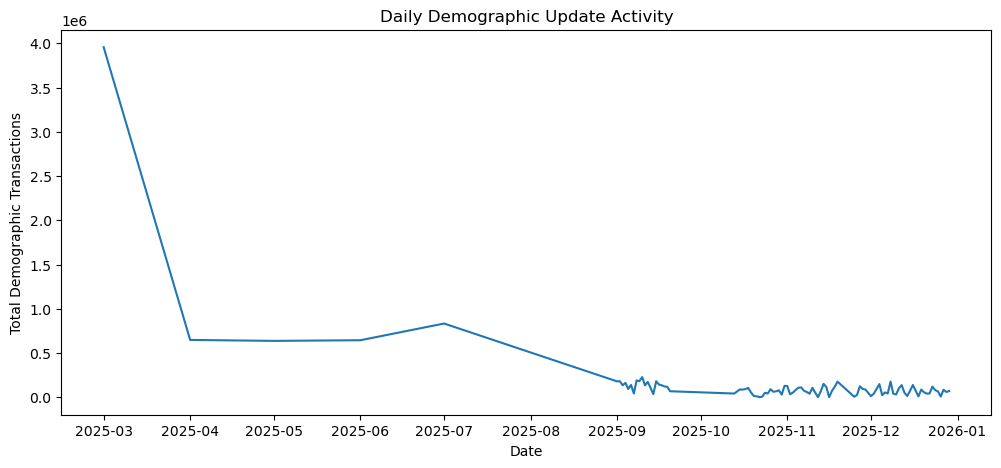

In [26]:
plt.figure(figsize=(12,5))
plt.plot(daily_demo)
plt.title("Daily Demographic Update Activity")
plt.xlabel("Date")
plt.ylabel("Total Demographic Transactions")
plt.savefig("daily_demographic_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### Age-wise Demographic Trend Over Time

In [10]:
age_demo_trend = (
    demographic_df
    .groupby("date")[["demo_age_5_17", "demo_age_17_"]]
    .sum()
)

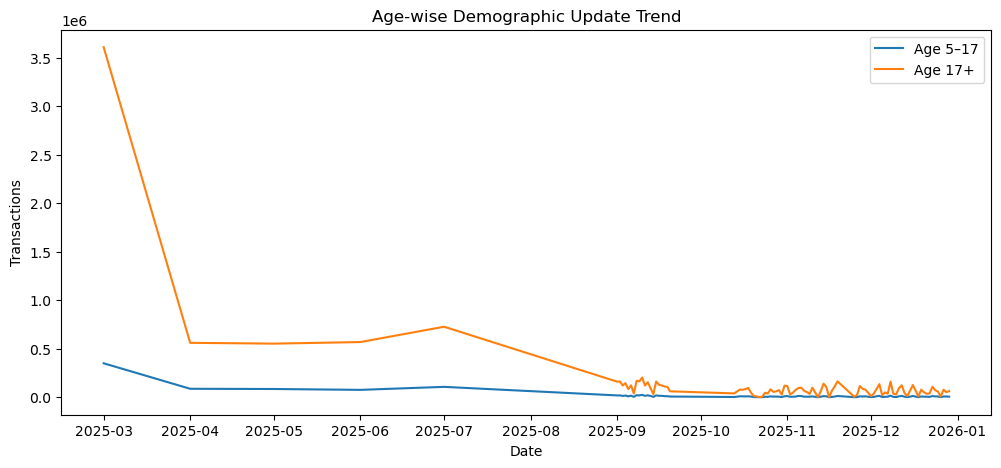

In [28]:
plt.figure(figsize=(12,5))
plt.plot(age_demo_trend)
plt.title("Age-wise Demographic Update Trend")
plt.xlabel("Date")
plt.ylabel("Transactions")
plt.legend(["Age 5–17", "Age 17+"])
plt.savefig("age_group_demographic_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### State-wise Demographic Load

In [12]:
state_demo = (
    demographic_df
    .groupby("state")["total_demographic"]
    .sum()
    .sort_values(ascending=False)
)


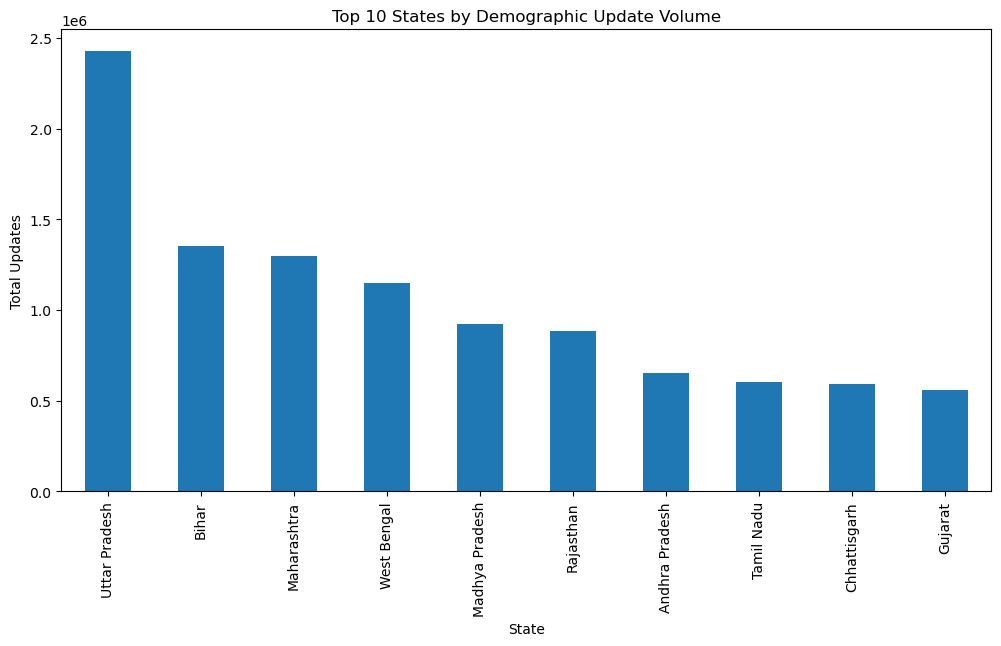

In [29]:
plt.figure(figsize=(12,6))
state_demo.head(10).plot(kind="bar")
plt.title("Top 10 States by Demographic Update Volume")
plt.xlabel("State")
plt.ylabel("Total Updates")
plt.savefig("state_wise_demographic_updates.png", dpi=300, bbox_inches="tight")
plt.show()

### District-Level Hotspots (Operational Pressure)

In [14]:
district_demo = (
    demographic_df
    .groupby("district")["total_demographic"]
    .sum()
    .sort_values(ascending=False)
)

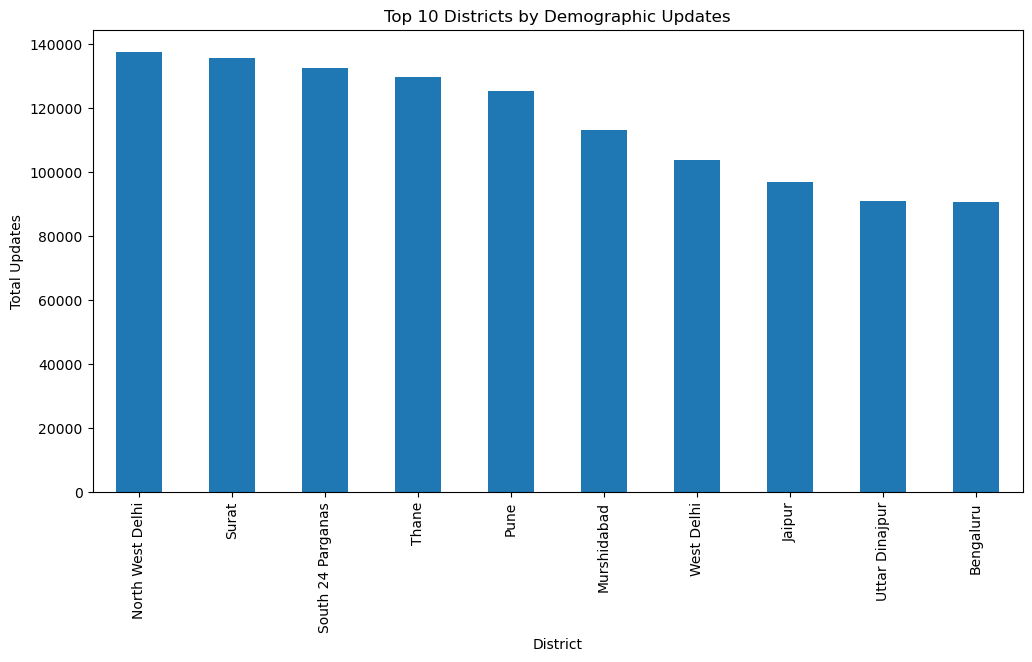

In [30]:

plt.figure(figsize=(12,6))
district_demo.head(10).plot(kind="bar")
plt.title("Top 10 Districts by Demographic Updates")
plt.xlabel("District")
plt.ylabel("Total Updates")
plt.savefig("district_wise_demographic_updates.png", dpi=300, bbox_inches="tight")
plt.show()

### Pincode-Level Distribution (Critical Insight)

In [16]:
pincode_demo = (
    demographic_df
    .groupby("pincode")["total_demographic"]
    .sum()
)

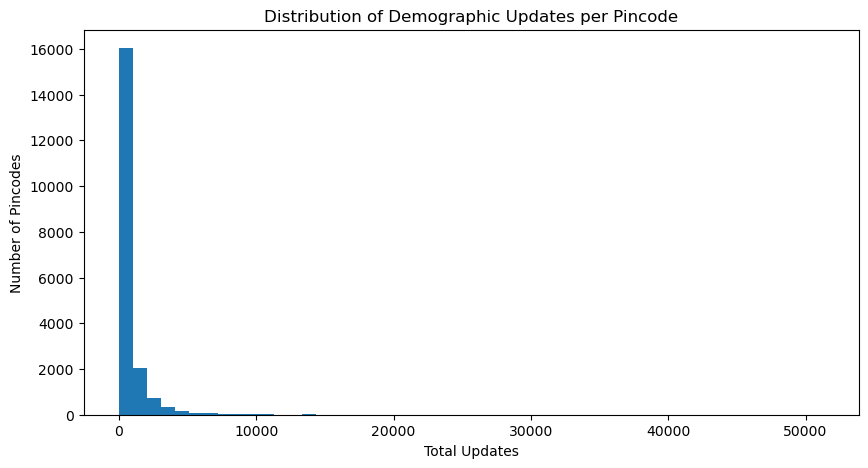

In [17]:
plt.figure(figsize=(10,5))
plt.hist(pincode_demo, bins=50)
plt.title("Distribution of Demographic Updates per Pincode")
plt.xlabel("Total Updates")
plt.ylabel("Number of Pincodes")
plt.show()

### Adult vs Minor Demographic Updates

In [18]:
minor_demo = demographic_df["demo_age_5_17"].sum()
adult_demo = demographic_df["demo_age_17_"].sum()

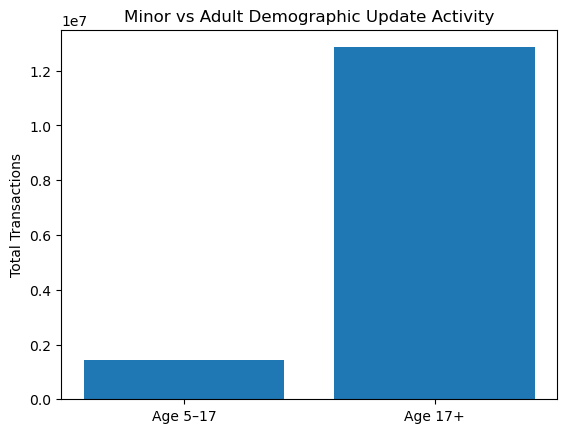

In [19]:
plt.figure()
plt.bar(
    ["Age 5–17", "Age 17+"],
    [minor_demo, adult_demo]
)
plt.title("Minor vs Adult Demographic Update Activity")
plt.ylabel("Total Transactions")
plt.show()

### Monthly Demographic Trend (Seasonality)

In [20]:
monthly_demo = (
    demographic_df
    .groupby(demographic_df["date"].dt.to_period("M"))["total_demographic"]
    .sum()
)

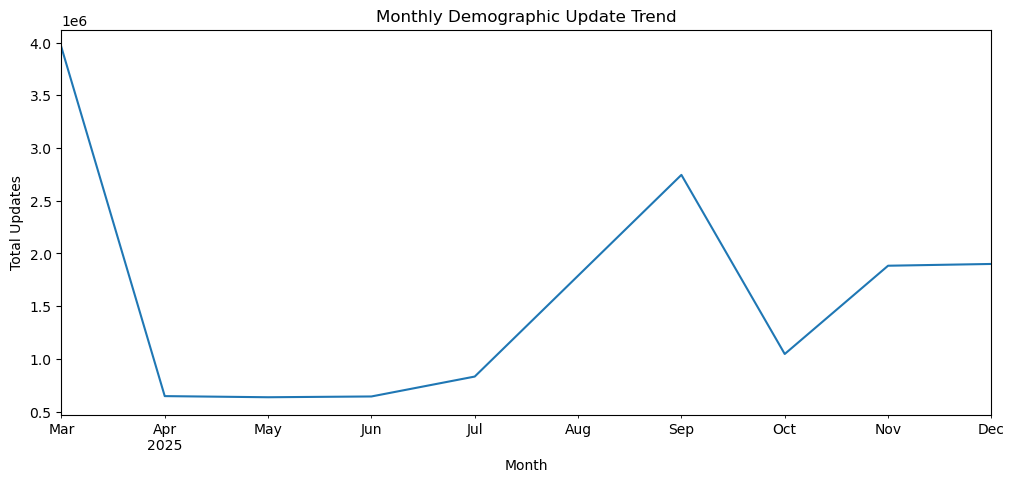

In [27]:
plt.figure(figsize=(12,5))
monthly_demo.plot()
plt.title("Monthly Demographic Update Trend")
plt.xlabel("Month")
plt.ylabel("Total Updates")
plt.savefig("monthly_demographic_trend.png", dpi=300, bbox_inches="tight")
plt.show()

### Demographic Load Concentration

In [22]:
pincode_sorted = pincode_demo.sort_values(ascending=False)

cumulative_share = (
    pincode_sorted.cumsum() /
    pincode_sorted.sum()
)

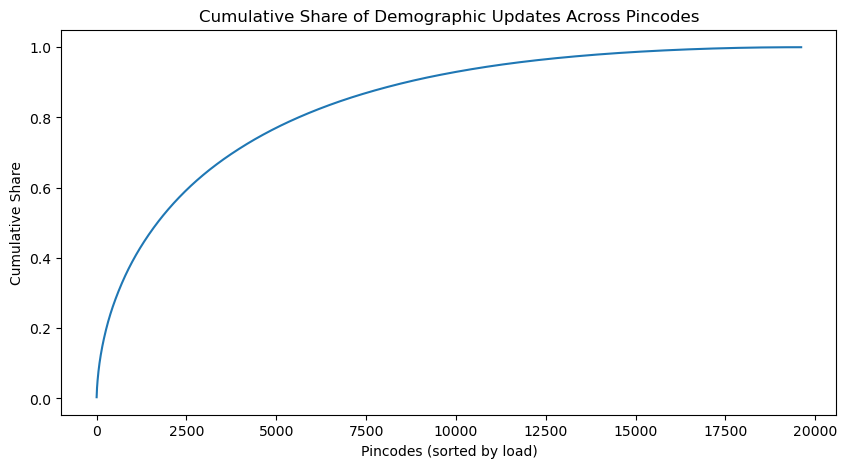

In [31]:
plt.figure(figsize=(10,5))
plt.plot(cumulative_share.values)
plt.title("Cumulative Share of Demographic Updates Across Pincodes")
plt.xlabel("Pincodes (sorted by load)")
plt.ylabel("Cumulative Share")
plt.savefig("cumulative_demographic_share.png", dpi=300, bbox_inches="tight")
plt.show()